# Diamond Dataset EDA

## Introduction

Diamonds are celebrated not just for their mesmerizing sparkle, but also for their diverse design potential, spanning from timeless solitaires to intricate pave settings. This variety offers boundless creative opportunities in crafting jewelry pieces, each accentuating the brilliance of these gems in its own distinctive way. Consequently, understanding how diamond characteristics influence its price becomes imperative.

In this exploratory data analysis, we will delve into the diamond dataset provided here to identify the key factors that influence the price of diamonds.


## Dataset Overview

Before considering our dataset, we need to know - how exactly a diamond can be described?

Any diamond can be basically described with four characteristics, informally known as the "four C's": carat, color, cut and clarity. This system, originally developed by Gemological Institute of America in 1953, is an internationally recognized standard for diamond evaluation.

So, what does this four characteristics mean:
1. **Clarity** is a measure of internal defects called ***inclusions***.  Inclusions may be crystals of a foreign material or another diamond crystal, or structural imperfections such as tiny cracks that can appear whitish or cloudy. The number, size, color, relative location, orientation, and visibility of inclusions can all affect the relative clarity of a diamond.

    Gradation (expensive -> cheap): FL (flawless), IF (internally flawless), VSS1, VSS2 (Very Very Slightly Included), VS1, VS2 (Very Slightly Included), SI1, SI2 (Slightly Included), I1, I2, I3 (Included).
2. **Color** is a measure of diamond color. Totally colorless diamonds are graded as D color, meaning it is absolutely free from any color. The next grade has a very slight trace of color, which can be observed by any expert diamond valuer/grading laboratory. However, when studded in jewellery these very light colored diamonds do not show any color or it is not possible to make out color shades. These are graded as E color or F color diamonds. Diamonds which show very little traces of color are graded as G or H color diamonds. Slightly colored diamonds are graded as I or J or K color.

    Gradation (expensive -> cheap): D (colorless) to Z (light).
3. **Cut** describes the manner in which a diamond has been shaped and polished from its beginning form as a rough stone to its final gem proportions. The cut of a diamond describes the quality of workmanship and the angles to which a diamond is cut. The following characteristics contribute to the cut:
    * Table percentage (corner-to-corner diameter of the table divided by overall diameter)
    * Depth percentage (overall depth divided by overall diameter)

    Gradation (cheap -> expensive): "Poor", "Fair", "Good", "Very Good", "Excellent", "Ideal".
4. **Carat** weight is a measure of diamond's mass. One carat is defined as 200 milligrams (about 0.007 ounces avoirdupois). The point unit—equal to one one-hundredth of a carat (0.01 carat, or 2 mg)—is commonly used for diamonds of less than one carat. All else being equal, the price per carat increases with carat weight, since larger diamonds are both rarer and more desirable for use as gemstones.The price per carat does not increase linearly with increasing size. Instead, there are sharp jumps around milestone carat weights, as demand is much higher for diamonds weighing just more than a milestone than for those weighing just less. As an example, a 0.99-carat diamond may have a significantly lower price per carat than a comparable 1.01-carat diamond, because of differences in demand.

Our dataset contains 53,940 entries. Each entry represents a diamond described by 10 features and 1 target variable (price).  Out of 10 features, we have 3 categorical features, and 7 numerical features:

| Name | Feature/Target | Type | Units |
| --- | --- | --- | --- |
| `carat` | Feature | Numerical | carat |
| `cut` | Feature | Categorical ||
| `color` | Feature | Categorical ||
| `clarity` | Feature | Categorical ||
| `depth` | Feature | Numerical ||
| `table` | Feature | Numerical ||
| `x` | Feature | Numerical | mm |
| `y` | Feature | Numerical | mm |
| `z` | Feature |Numerical| mm |
| `price` | Target | Numerical | USD |


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('diamonds.csv')
df = df.drop('Unnamed: 0', axis=1)

## Analysis

In this section we will conduct an analysis of our dataset, specifically:
* calculate descriptive statistics for our dataset
* correlation between dataset features
* feature distribution
* relation between features and target variable

Let's analyze correlation between numerical features

In [12]:
target = 'price'
cat_feats = ['cut', 'color', 'clarity']
num_feats = [col for col in df.columns if col not in cat_feats+[target]]

Let's get descriptive statistics for the numerical variables.

In [13]:
def get_stats(df, include='all'):
    stats_df = df.describe(include=include).transpose()
    return stats_df

get_stats(df[num_feats + [target]])

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00


...and for the categorical features.

In [14]:
get_stats(df[cat_feats])

,count,unique,top,freq
cut,53940,5,Ideal,21551
color,53940,7,G,11292
clarity,53940,8,SI1,13065


Average weight of a diamond is 0.8 carats, with most diamonds having Ideal cut, color of G and Slightly Included clarity.

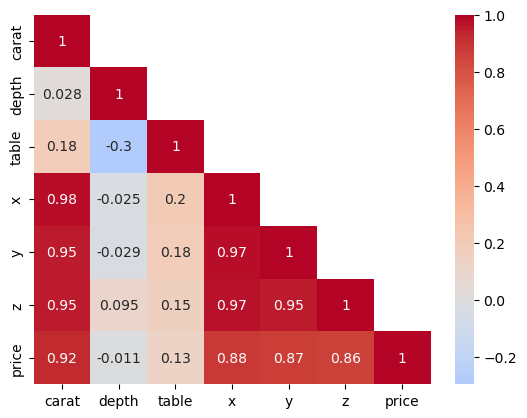

In [15]:
def plot_corrmat(df):
    cc = np.corrcoef(df, rowvar=False)
    mask = np.triu(cc)
    mask[np.eye(mask.shape[0], dtype=bool)] = False

    sns.heatmap(cc, center=0, cmap='coolwarm', annot=True, mask=mask,
                xticklabels=df.columns, yticklabels=df.columns)


plot_corrmat(df[num_feats+[target]])

We observe that features `carat`, `x`, `y` and `z` are heavily correlated between each other, which is not surprising given that this is diamond dimensions. The price is heavily correlated with diamond dimensions and its weight (as it should be). Due to that, we won't analyze x,y,z features further.

In [16]:
df = df.drop(['x', 'y', 'z'], axis=1)

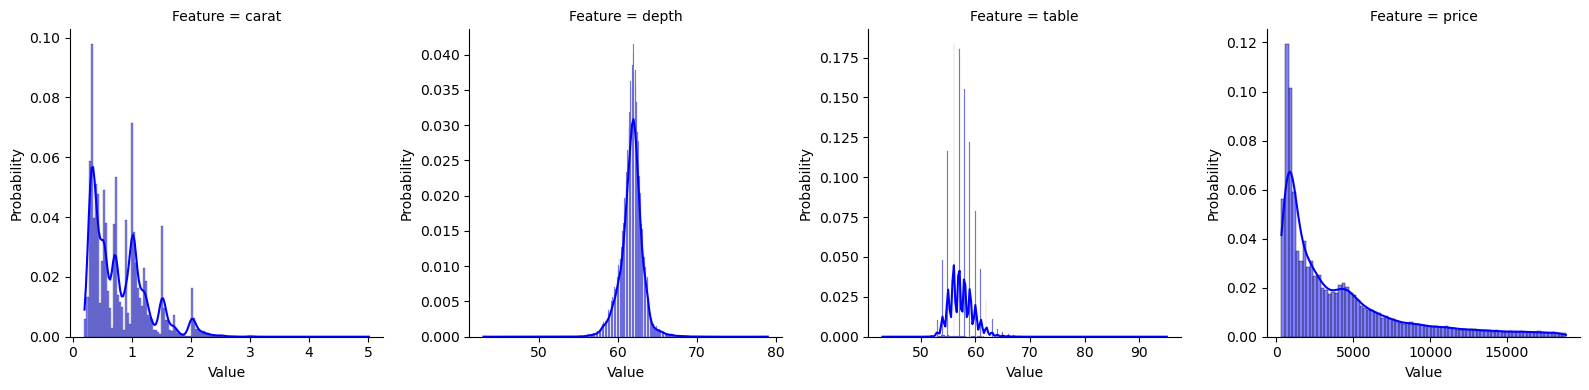

In [17]:
numeric_features= df.select_dtypes(exclude=["object","bool"])
numeric_features = numeric_features.stack().reset_index().rename(columns = {"level_1":"Feature", 0:"Value"})
g = sns.FacetGrid(data =numeric_features, col="Feature",  col_wrap=4, aspect=1, height=4, sharex=False, sharey=False)
g = g.map(sns.histplot, "Value", color ='blue', stat='probability', kde=True)
plt.subplots_adjust(hspace=0.6)

We have `depth` and `table` distributed normally, with `price` distributed exponentially.

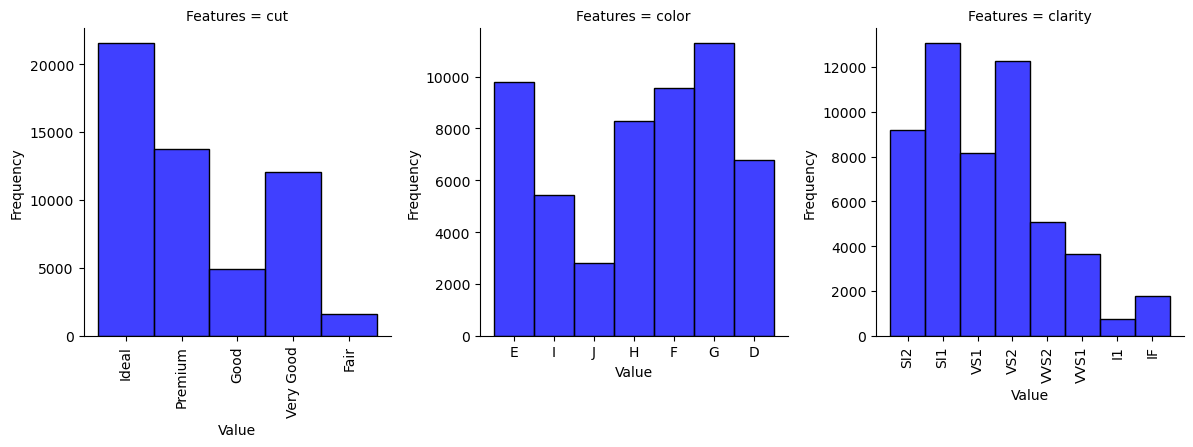

In [18]:
cat_features= df.select_dtypes(include=["object"])
cat_features = cat_features.stack().reset_index().rename(columns = {"level_1":"Features", 0:"Value"})
g = sns.FacetGrid(data=cat_features, col="Features",  col_wrap=4, aspect=1, height=4, sharex=False, sharey=False)
g = g.map(sns.histplot, "Value", color ='blue', stat='frequency')
plt.subplots_adjust(hspace=0.6)
#plt.suptitle("Histograms of various features")
for i, axes in enumerate(g.axes.flat):
    if i in [0, 2, 3, 4, 5, 8, 9]:
        _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

In our case most diamonds have Ideal cut, followed by Premium and Very Good cuts. The dataset is divided nearly in half by colorless (D, E, F) or near-colorless (G, H, I, J) diamonds. Majority of diamonds have slightly included (SI1 and SI2) or very slightly included (VS1 and VS2).

Let's check relation between numerical features and target variable (price) on scatterplots, using categorical features (cut, color, clarity) as hue.

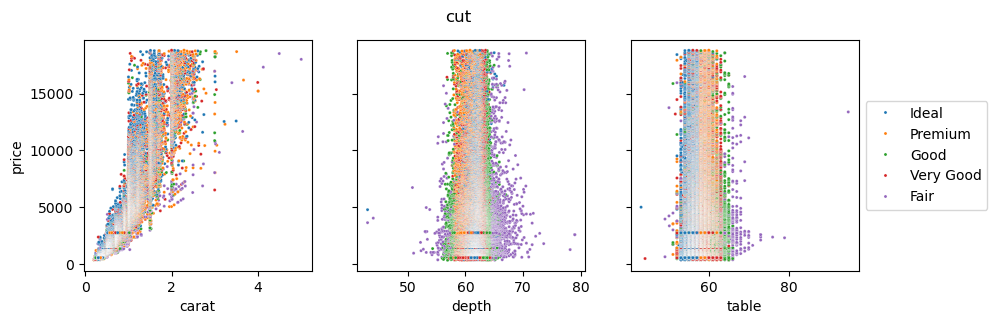

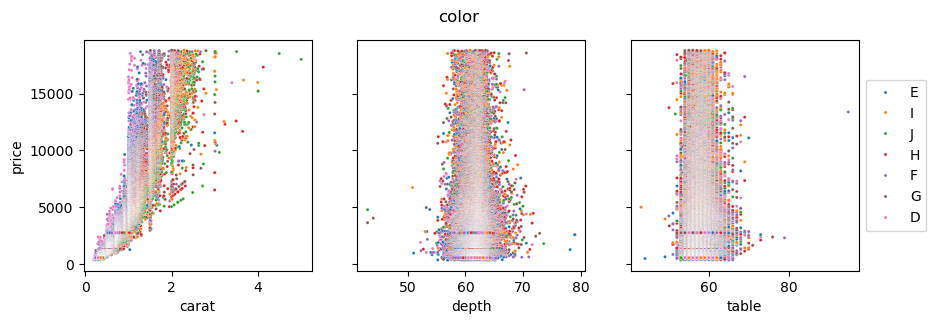

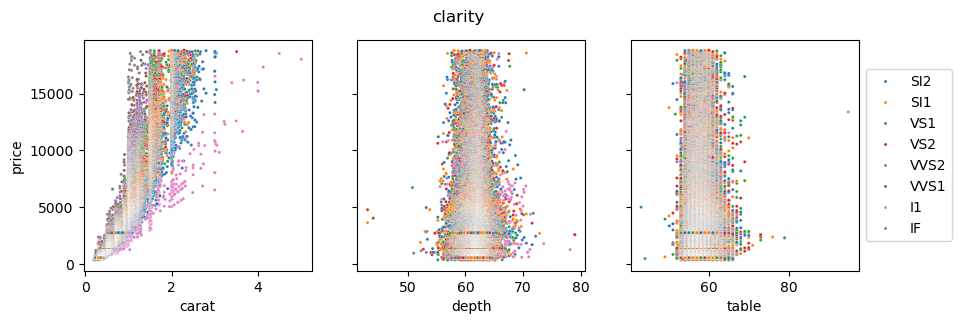

In [19]:
for cat_feat in ['cut', 'color', 'clarity']:
    fig, axs = plt.subplots(1, 3)
    fig.set_size_inches(10, 3)
    fig.suptitle(cat_feat)

    feats = ['carat', 'depth', 'table']

    for i in range(len(feats)):
        _ = sns.scatterplot(df, x=feats[i],y='price', hue=cat_feat, s=5, ax=axs[i])
        if i < len(feats) - 1:
            axs[i].get_legend().remove()
        else:
            axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    for ax in axs.flat:
        ax.label_outer()

As one can see, the higher the diamonds weight (`carat`), the higher its `price`, while `depth` and `table` don't contribute to `price` much. Diamonds with worse `clarity` cost less, and colorless diamonds (`color` equal to D, E, F) cost more.

## Conclusion

As expected, diamond prices are primarily determined by weight, increasing exponentially with weight, while factors like depth and table dimensions have minimal impact on pricing.

Our dataset predominantly consists of expensive diamonds with Ideal, Premium, or Very Good cuts, color grades of D, E, F (colorless) or G, H, I, J (near-colorless), and slight or very slight inclusions.